In [1]:
!pip install numpy

  Using cached numpy-1.20.3-cp37-cp37m-win_amd64.whl (13.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.1 requires matplotlib>=2.2, which is not installed.
seaborn 0.11.1 requires pandas>=0.23, which is not installed.
seaborn 0.11.1 requires scipy>=1.0, which is not installed.


In [2]:
!pip install rasterio

^C


In [1]:
# !pip install pillow

In [3]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

C:\Users\David\anaconda3\envs\py37\lib\site-packages\numpy\__init__.py:143: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Users\David\anaconda3\envs\py37\python.exe"
  * The NumPy version is: "1.20.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: The specified module could not be found.


In [4]:
from sklearn.datasets import make_friedman1
from sklearn.decomposition import PCA
import os
import rasterio
import gdal
from scipy.interpolate import griddata
from scipy import interpolate

# from funk_svd import SVD
import pandas as pd

ModuleNotFoundError: No module named 'sklearn'

In [3]:
dataset = rasterio.open('flood.tif')

X=dataset.read(1)

X.shape

NameError: name 'rasterio' is not defined

In [247]:
hand_data = rasterio.open('hand.tif')

hand=hand_data.read(1)

hand.shape

(617, 761)

In [248]:
dataset = rasterio.open('order.tif')

order=dataset.read(1)

order.shape

(617, 761)

In [249]:
# from scipy.ndimage import gaussian_filter
# X[X<-1000]=0
# Xs=gaussian_filter(X, sigma=2)

In [250]:
# X[X==-3e38]=0

In [251]:
# pca = PCA(0.97)
# pca.fit(X)

# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# X_pca = pca.transform(X)

# X_restore = pca.inverse_transform(X_pca)

In [252]:
grid_x, grid_y = np.mgrid[0:X.shape[0], 0:X.shape[1]]

xc=grid_x[X>-1e3]
yc=grid_y[X>-1e3]
points=np.column_stack((xc,yc))
values=X[X>-1e3]+hand[X>-1e3]

In [253]:
# df=pd.DataFrame()

In [254]:
# df['u_id']=xc
# df['i_id']=yc
# df['rating']=values

In [255]:
# train = df.sample(frac=0.8, random_state=7)
# val = df.drop(train.index.tolist()) #.sample(frac=0.5, random_state=8)
# # test = df.drop(train.index.tolist()).drop(val.index.tolist())

# svd = SVD(lr=0.001, reg=0.005, n_epochs=1000, n_factors=1000,
#           early_stopping=True, shuffle=False, min_rating=0, max_rating=values.max()*2)

# svd.fit(X=train, X_val=val)

In [256]:
# output=pd.DataFrame()
# output['u_id']=grid_x.ravel()
# output['i_id']=grid_y.ravel()

In [257]:
# pred = svd.predict(output)

In [258]:
# result=np.reshape(pred,X.shape)

In [259]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
# grid_z0 = griddata(points, values, (grid_x, grid_y), method='linear')
# grid_z0 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [260]:
# tck = interpolate.bisplrep(xc, yc, values, s=0)
# znew = interpolate.bisplev(grid_x[:], grid_y[:], tck)

In [261]:
# rbf = interpolate.Rbf(xc, yc, values, epsilon=2)
# ZI = interpolate.rbf(grid_x, grid_y)

In [262]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1, projection='3d')

# # ax.plot_trisurf(triang, z, cmap='jet')
# ax.scatter(hand[X>-1e3].ravel(),grid_z0[X>-1e3].ravel(),X[X>-1e3].ravel(), marker='.', s=10, c="black", alpha=0.5)
# # ax.scatter(hand.ravel(),grid_z0.ravel(),grid_z1.ravel(), marker='.', s=10, c="black", alpha=0.5)

# # ax.view_init(elev=60, azim=-45)

# # plt.scatter(hand.ravel(),grid_z0.ravel(),X.ravel())

# # plt.scatter(hand[X<].ravel(),grid_z0.ravel(),X.ravel())

In [263]:
np.unique(order)

array([  1,   2,   3,   6, 128], dtype=uint8)

In [272]:
threshold=-1e3
ind = np.where((order==6)& (X>threshold))
X1=hand[ind]
X2=grid_z0[ind]
X0=np.column_stack((X1.ravel(),X2.ravel()))
values=X[ind]

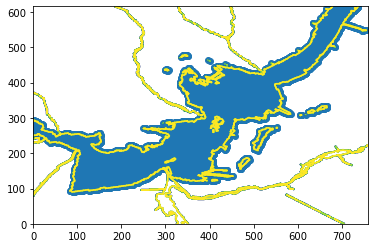

In [273]:
plt.contour(grid_y,grid_x,X)
plt.scatter(grid_y[ind],grid_x[ind])

In [274]:
from sklearn.ensemble import RandomForestRegressor
# >>> from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=20, random_state=0)
# regr.fit(X0, values)
regr.fit(X0, values)

RandomForestRegressor(max_depth=20, random_state=0)

In [275]:
grid_z0[np.isnan(grid_z0)]=0

In [276]:
grid_z1=regr.predict(np.column_stack((hand.ravel(),grid_z0.ravel())))

grid_z1=np.reshape(grid_z1,X.shape)

In [277]:
with rasterio.open(
    'smooth.tif',
    'w',
    driver='GTiff',
    height=dataset.height,
    width=dataset.width,
    count=1,
    dtype=np.float64,
    crs=dataset.crs,
    transform=dataset.transform,
) as dst:
    dst.write(grid_z1, 1)